# Varsity Analysis

## Summary:

Comparing ourselves to other teams we were the clear winners by scoring the most points, most people on the bench, and least amount of conceded people! Our defense did a LOT better than the other teams so congrats on that! 

Comparing each of our teams, Team Ball came out on top in all areas.

Looks like we dominated in the Birmingham rules games but could do with working harder on improving our Sheffield rules games for next year so hopefully we can dominate even more!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import re

In [6]:
# read the scores database
df = pd.read_csv("scores.csv")

# add columns for number of people conceeded
df['Birmingham Conceded'] = ''
df['Sheffield Conceded'] = ''
df['Exeter Conceded'] = ''
df['Bournemouth Conceded'] = ''

# cycles through each row calculating number conceded for each game
for ind in df.index:
    bham_rules_team_A = re.sub(r'\s[0-9]+', '', df['Birmingham Team A'][ind])
    bham_rules_team_B = re.sub(r'\s[0-9]+', '', df['Birmingham Team B'][ind])
    shef_rules_team_A = re.sub(r'\s[0-9]+', '', df['Sheffield Team A'][ind])
    shef_rules_team_B = re.sub(r'\s[0-9]+', '', df['Sheffield Team B'][ind])
    
    df.at[ind, bham_rules_team_A + " Conceded"] = df.at[ind, bham_rules_team_B + " People"]
    df.at[ind, bham_rules_team_B + " Conceded"] = df.at[ind, bham_rules_team_A + " People"]
    df.at[ind, shef_rules_team_A + " Conceded"] = df.at[ind, shef_rules_team_B + " People"]
    df.at[ind, shef_rules_team_B + " Conceded"] = df.at[ind, shef_rules_team_A + " People"]

# All Teams

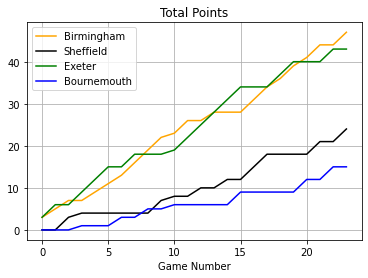

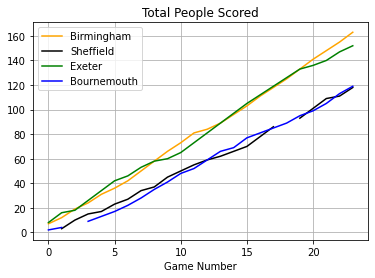

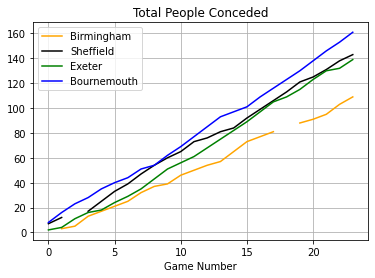

In [7]:
# Shows total number of points accumulated as the games go on
df['Birmingham Points'].cumsum().plot(use_index=True, label='Birmingham', color='orange')
df['Sheffield Points'].cumsum().plot(use_index=True, label='Sheffield', color='black')
df['Exeter Points'].cumsum().plot(use_index=True, label='Exeter', color='green')
df['Bournemouth Points'].cumsum().plot(use_index=True, label='Bournemouth', color='blue')
plt.title("Total Points")
plt.xlabel("Game Number")
plt.legend()
plt.grid()

# Shows total number of people scored on the bench as the games go on
plt.figure()
df['Birmingham People'].cumsum().plot(use_index=True, label='Birmingham', color='orange')
df['Sheffield People'].cumsum().plot(use_index=True, label='Sheffield', color='black')
df['Exeter People'].cumsum().plot(use_index=True, label='Exeter', color='green')
df['Bournemouth People'].cumsum().plot(use_index=True, label='Bournemouth', color='blue')
plt.title("Total People Scored")
plt.xlabel("Game Number")
plt.legend()
plt.grid()

# Shows total number of people conceeded on the bench as the games go on
plt.figure()
df['Birmingham Conceded'].cumsum().plot(use_index=True, label='Birmingham', color='orange')
df['Sheffield Conceded'].cumsum().plot(use_index=True, label='Sheffield', color='black')
df['Exeter Conceded'].cumsum().plot(use_index=True, label='Exeter', color='green')
df['Bournemouth Conceded'].cumsum().plot(use_index=True, label='Bournemouth', color='blue')
plt.title("Total People Conceded")
plt.xlabel("Game Number")
plt.legend()
plt.grid()
plt.show()


# Birmingham Analysis

## Points Scored

### All Points

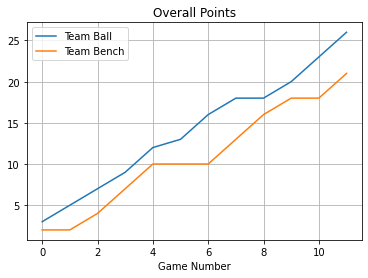

Team Bench Overall Points =  21
Team Ball Overall Points =  26


In [8]:
# creating new databases for the two separate Birmingham teams
df_bham_ball = df.loc[(df['Birmingham Team A'] == 'Birmingham 1') | (df['Sheffield Team A'] == 'Birmingham 1')]
df_bham_bench = df.loc[(df['Birmingham Team A'] == 'Birmingham 2') | (df['Sheffield Team A'] == 'Birmingham 2')]

df_bham_ball.reset_index(inplace=True, drop=True)
df_bham_bench.reset_index(inplace=True, drop=True)

df_bham_ball['Birmingham Points'].cumsum().plot(use_index=True, label='Team Ball')
df_bham_bench['Birmingham Points'].cumsum().plot(use_index=True, label='Team Bench')
plt.title("Overall Points")
plt.xlabel("Game Number")
plt.legend()
plt.grid()

plt.show()

print("Team Bench Overall Points = ", df_bham_bench['Birmingham Points'].sum())
print("Team Ball Overall Points = ", df_bham_ball['Birmingham Points'].sum())

### Birmingham Rules

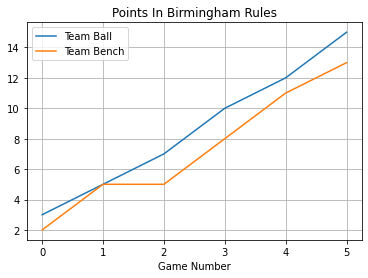

Team Bench Birmingham Rules Points =  13
Team Ball Birmingham Rules Points =  15


In [9]:
# obtain information for Bham rules only
df_bham_rules_ball = df.loc[df['Birmingham Team A'] == 'Birmingham 1']
df_bham_rules_bench = df.loc[df['Birmingham Team A'] == 'Birmingham 2']

# reset index
df_bham_rules_ball.reset_index(inplace=True, drop=True)
df_bham_rules_bench.reset_index(inplace=True, drop=True)

df_bham_rules_ball['Birmingham Points'].cumsum().plot(use_index=True, label='Team Ball')
df_bham_rules_bench['Birmingham Points'].cumsum().plot(use_index=True, label='Team Bench')
plt.title("Points In Birmingham Rules")
plt.xlabel("Game Number")
plt.legend()
plt.grid()

plt.show()

print("Team Bench Birmingham Rules Points = ", df_bham_rules_bench['Birmingham Points'].sum())
print("Team Ball Birmingham Rules Points = ", df_bham_rules_ball['Birmingham Points'].sum())

### Sheffield Rules

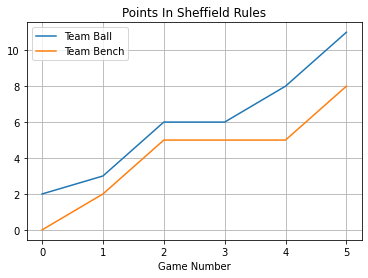

Team Bench Sheffield Rules Points =  8
Team Ball Sheffield Rules Points =  11


In [10]:
# obtain information for Bham rules only
df_sheff_rules_ball = df.loc[df['Sheffield Team A'] == 'Birmingham 1']
df_sheff_rules_bench = df.loc[df['Sheffield Team A'] == 'Birmingham 2']

# reset index
df_sheff_rules_ball.reset_index(inplace=True, drop=True)
df_sheff_rules_bench.reset_index(inplace=True, drop=True)

df_sheff_rules_ball['Birmingham Points'].cumsum().plot(use_index=True, label='Team Ball')
df_sheff_rules_bench['Birmingham Points'].cumsum().plot(use_index=True, label='Team Bench')
plt.title("Points In Sheffield Rules")
plt.xlabel("Game Number")
plt.legend()
plt.grid()

plt.show()

print("Team Bench Sheffield Rules Points = ", df_sheff_rules_bench['Birmingham Points'].sum())
print("Team Ball Sheffield Rules Points = ", df_sheff_rules_ball['Birmingham Points'].sum())

### Comparing Rules 

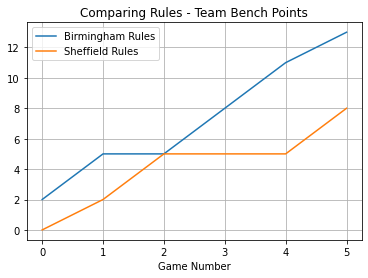

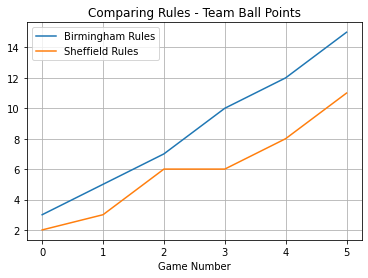

Team Bench Birmingham Rules Mean Points = 2.17
Team Bench Sheffield Rules Mean Points = 1.33
Team Ball Birmingham Rules Mean Points = 2.50
Team Ball Sheffield Rules Mean Points = 1.83


In [11]:
df_bham_rules_bench['Birmingham Points'].cumsum().plot(use_index=True, label='Birmingham Rules')
df_sheff_rules_bench['Birmingham Points'].cumsum().plot(use_index=True, label='Sheffield Rules')
plt.title("Comparing Rules - Team Bench Points")
plt.xlabel("Game Number")
plt.legend()
plt.grid()

plt.figure()
df_bham_rules_ball['Birmingham Points'].cumsum().plot(use_index=True, label='Birmingham Rules')
df_sheff_rules_ball['Birmingham Points'].cumsum().plot(use_index=True, label='Sheffield Rules')
plt.title("Comparing Rules - Team Ball Points")
plt.xlabel("Game Number")
plt.legend()
plt.grid()

plt.show()

print("Team Bench Birmingham Rules Mean Points = %.2f" % df_bham_rules_bench['Birmingham Points'].mean())
print("Team Bench Sheffield Rules Mean Points = %.2f" % df_sheff_rules_bench['Birmingham Points'].mean())
print("Team Ball Birmingham Rules Mean Points = %.2f" % df_bham_rules_ball['Birmingham Points'].mean())
print("Team Ball Sheffield Rules Mean Points = %.2f" % df_sheff_rules_ball['Birmingham Points'].mean())

## Scored People 

### All Games

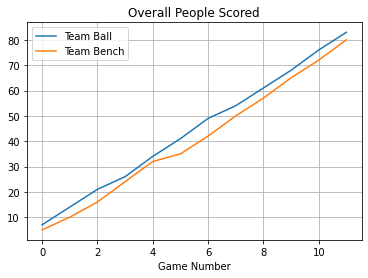

Team Bench Overall People Scored =  80
Team Ball Overall People Scored =  83


In [12]:
df_bham_ball['Birmingham People'].cumsum().plot(use_index=True, label='Team Ball')
df_bham_bench['Birmingham People'].cumsum().plot(use_index=True, label='Team Bench')
plt.title("Overall People Scored")
plt.xlabel("Game Number")
plt.legend()
plt.grid()

plt.show()

print("Team Bench Overall People Scored = ", df_bham_bench['Birmingham People'].sum())
print("Team Ball Overall People Scored = ", df_bham_ball['Birmingham People'].sum())

### Birmingham Rules

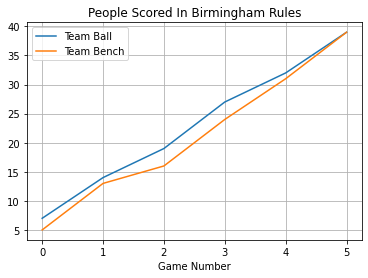

Team Bench Birmingham Rules People Scored =  39
Team Ball Birmingham Rules People Scored =  39


In [13]:
df_bham_rules_ball['Birmingham People'].cumsum().plot(use_index=True, label='Team Ball')
df_bham_rules_bench['Birmingham People'].cumsum().plot(use_index=True, label='Team Bench')
plt.title("People Scored In Birmingham Rules")
plt.xlabel("Game Number")
plt.legend()
plt.grid()

plt.show()

print("Team Bench Birmingham Rules People Scored = ", df_bham_rules_bench['Birmingham People'].sum())
print("Team Ball Birmingham Rules People Scored = ", df_bham_rules_ball['Birmingham People'].sum())

### Sheffield Rules

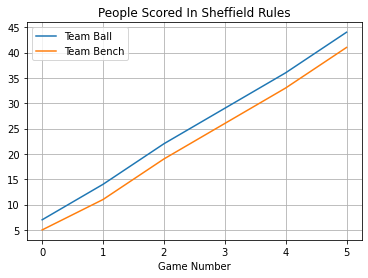

Team Bench Sheffield Rules Points =  41
Team Ball Sheffield Rules Points =  44


In [14]:
df_sheff_rules_ball['Birmingham People'].cumsum().plot(use_index=True, label='Team Ball')
df_sheff_rules_bench['Birmingham People'].cumsum().plot(use_index=True, label='Team Bench')
plt.title("People Scored In Sheffield Rules")
plt.xlabel("Game Number")
plt.legend()
plt.grid()

plt.show()

print("Team Bench Sheffield Rules Points = ", df_sheff_rules_bench['Birmingham People'].sum())
print("Team Ball Sheffield Rules Points = ", df_sheff_rules_ball['Birmingham People'].sum())

### Comparing Rules

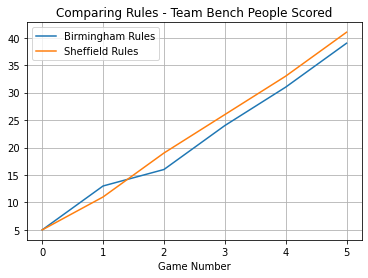

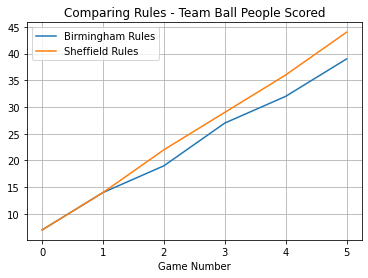

Team Bench Birmingham Rules Mean People Scored = 6.50
Team Bench Sheffield Rules Mean People Scored = 6.83
Team Ball Birmingham Rules Mean People Scored = 6.50
Team Ball Sheffield Rules Mean People Scored = 7.33


In [15]:
df_bham_rules_bench['Birmingham People'].cumsum().plot(use_index=True, label='Birmingham Rules')
df_sheff_rules_bench['Birmingham People'].cumsum().plot(use_index=True, label='Sheffield Rules')
plt.title("Comparing Rules - Team Bench People Scored")
plt.xlabel("Game Number")
plt.legend()
plt.grid()

plt.figure()
df_bham_rules_ball['Birmingham People'].cumsum().plot(use_index=True, label='Birmingham Rules')
df_sheff_rules_ball['Birmingham People'].cumsum().plot(use_index=True, label='Sheffield Rules')
plt.title("Comparing Rules - Team Ball People Scored")
plt.xlabel("Game Number")
plt.legend()
plt.grid()

plt.show()

print("Team Bench Birmingham Rules Mean People Scored = %.2f" % df_bham_rules_bench['Birmingham People'].mean())
print("Team Bench Sheffield Rules Mean People Scored = %.2f" % df_sheff_rules_bench['Birmingham People'].mean())
print("Team Ball Birmingham Rules Mean People Scored = %.2f" % df_bham_rules_ball['Birmingham People'].mean())
print("Team Ball Sheffield Rules Mean People Scored = %.2f" % df_sheff_rules_ball['Birmingham People'].mean())

## People Conceded

### All Games

Note: Missing data for 2 games for Team Ball

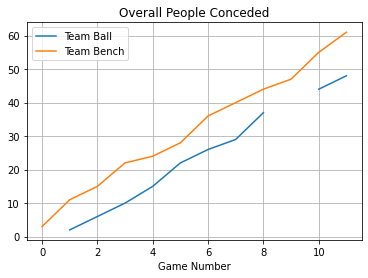

Team Bench Overall People Conceded =  61.0
Team Ball Overall People Conceded =  48.0


In [16]:
df_bham_ball['Birmingham Conceded'].cumsum().plot(use_index=True, label='Team Ball')
df_bham_bench['Birmingham Conceded'].cumsum().plot(use_index=True, label='Team Bench')
plt.title("Overall People Conceded")
plt.xlabel("Game Number")
plt.legend()
plt.grid()

plt.show()

print("Team Bench Overall People Conceded = ", df_bham_bench['Birmingham Conceded'].sum())
print("Team Ball Overall People Conceded = ", df_bham_ball['Birmingham Conceded'].sum())

### Birmingham Rules

Missing score from first game for Team ball

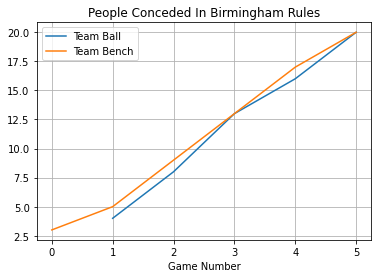

Team Bench Birmingham Rules People Conceded =  20.0
Team Ball Birmingham Rules People Conceded =  20.0


In [17]:
df_bham_rules_ball['Birmingham Conceded'].cumsum().plot(use_index=True, label='Team Ball')
df_bham_rules_bench['Birmingham Conceded'].cumsum().plot(use_index=True, label='Team Bench')
plt.title("People Conceded In Birmingham Rules")
plt.xlabel("Game Number")
plt.legend()
plt.grid()

plt.show()

print("Team Bench Birmingham Rules People Conceded = ", df_bham_rules_bench['Birmingham Conceded'].sum())
print("Team Ball Birmingham Rules People Conceded = ", df_bham_rules_ball['Birmingham Conceded'].sum())

### Sheffield Rules

With the way the code plots the data, the final data point for Team Ball was not shown so I jankily added the final data point as a cross.

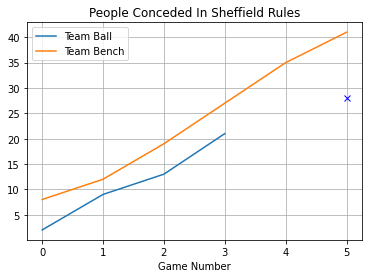

Team Bench Sheffield Rules People Conceded =  41.0
Team Ball Sheffield Rules People Conceded =  28.0


In [19]:
df_sheff_rules_ball['Birmingham Conceded'].cumsum().plot(use_index=True, label='Team Ball')
plt.plot(5,28, 'bx') # adding missing data point
df_sheff_rules_bench['Birmingham Conceded'].cumsum().plot(use_index=True, label='Team Bench')
plt.title("People Conceded In Sheffield Rules")
plt.xlabel("Game Number")
plt.legend()
plt.grid()

plt.show()

print("Team Bench Sheffield Rules People Conceded = ", df_sheff_rules_bench['Birmingham Conceded'].sum())
print("Team Ball Sheffield Rules People Conceded = ", df_sheff_rules_ball['Birmingham Conceded'].sum())

### Comparing Rules

Again, had to jankily add the final data point for Team Ball in sheff rules

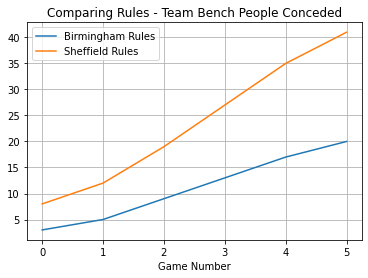

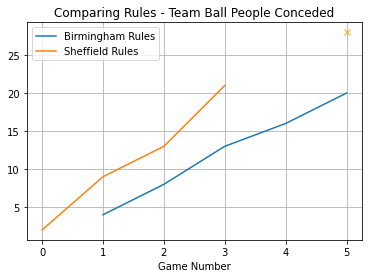

Team Bench Birmingham Rules Mean People Conceded = 3.33
Team Bench Sheffield Rules Mean People Conceded = 6.83
Team Ball Birmingham Rules Mean People Conceded = 4.00
Team Ball Sheffield Rules Mean People Conceded = 5.60


In [15]:
df_bham_rules_bench['Birmingham Conceded'].cumsum().plot(use_index=True, label='Birmingham Rules')
df_sheff_rules_bench['Birmingham Conceded'].cumsum().plot(use_index=True, label='Sheffield Rules')
plt.title("Comparing Rules - Team Bench People Conceded")
plt.xlabel("Game Number")
plt.legend()
plt.grid()

plt.figure()
df_bham_rules_ball['Birmingham Conceded'].cumsum().plot(use_index=True, label='Birmingham Rules')
df_sheff_rules_ball['Birmingham Conceded'].cumsum().plot(use_index=True, label='Sheffield Rules')
plt.plot(5, df_sheff_rules_ball['Birmingham Conceded'].cumsum().loc[5], color='orange', marker='x')
plt.title("Comparing Rules - Team Ball People Conceded")
plt.xlabel("Game Number")
plt.legend()
plt.grid()

plt.show()

print("Team Bench Birmingham Rules Mean People Conceded = %.2f" % df_bham_rules_bench['Birmingham Conceded'].mean())
print("Team Bench Sheffield Rules Mean People Conceded = %.2f" % df_sheff_rules_bench['Birmingham Conceded'].mean())
print("Team Ball Birmingham Rules Mean People Conceded = %.2f" % df_bham_rules_ball['Birmingham Conceded'].mean())
print("Team Ball Sheffield Rules Mean People Conceded = %.2f" % df_sheff_rules_['Birmingham Conceded'].mean())